<center> Andrea Elliott <center> <br> 
<center> Regis University <center> <br>
<center> Due: September 11, 2022 <center>


### Choose a dataset from the World Bank <br>
I chose a dataset that shows birthrate, which is defined as the number of live births per 1000s people, estimated based on midyear population. The metadata for this dataset clarifies that the entries for some countries in some years are estimations based on interpolation.  I noticed that the countries starting with the letter 'U' actually had a nice diversity and a good representation of different locations on around the globe, and those are the countries I selected.


In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
!head Birthrate.csv

Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,Uganda,UGA,48.584,48.318,48.04,47.748,47.438,47.101,46.728,46.308,45.834,45.299,44.693,44.007,43.248,42.428,41.564,40.68,39.8,38.947,38.135,37.377,36.674
"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,United Arab Emirates,ARE,16.494,15.996,15.514,15.024,14.518,14.001,13.49,13.01,12.581,12.208,11.888,11.616,11.377,11.159,10.958,10.772,10.603,10.456,10.331,10.223,10.126
"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,United States,USA,14.4,14.1,14,14.1,14,14,14.3,14.3,14,13.5,13,12.7,12.6,12.4,12.5,12.4,12.2,11.8,11.6,11.4,10.9
"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,Uzb

### Load the dataset into a dataframe.

In [154]:
birth = pd.read_csv('Birthrate.csv', sep = ',')

In [155]:
birth.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,Uganda,UGA,48.584,48.318,48.040,47.748,47.438,47.101,...,44.007,43.248,42.428,41.564,40.680,39.800,38.947,38.135,37.377,36.674
1,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,United Arab Emirates,ARE,16.494,15.996,15.514,15.024,14.518,14.001,...,11.616,11.377,11.159,10.958,10.772,10.603,10.456,10.331,10.223,10.126
2,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,United States,USA,14.400,14.100,14.000,14.100,14.000,14.000,...,12.700,12.600,12.400,12.500,12.400,12.200,11.800,11.600,11.400,10.900
3,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,Uzbekistan,UZB,21.400,20.500,21.100,19.900,20.900,20.400,...,21.200,21.000,22.500,23.300,23.500,22.800,22.100,23.300,24.300,24.600
4,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,Ukraine,UKR,7.800,7.700,8.100,8.500,9.000,9.000,...,11.000,11.400,11.100,10.800,10.700,10.300,9.400,8.700,8.100,7.800


In [156]:
type(birth)

pandas.core.frame.DataFrame

### Working with Columns <br>
First I will look at the columns to decide what needs my attention. 'Series Name', 'Series Code', and potentially 'Country Code' could be dropped. If this was a situation in which I was working with multiple tables, I would probably want to hold on to 'Country Code' so it could be used to merge tables. However, since that isn't the case, I will drop it for this exercise. I'm also going to clean up the years a bit so that just the year label is given for each column head.

In [157]:
birth.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]',
       '2020 [YR2020]'],
      dtype='object')

In [158]:
birth.drop(['Series Name', 'Series Code', 'Country Code'], axis = 1, inplace = True)

In [159]:
birth.head()

,Country Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Uganda,48.584,48.318,48.040,47.748,47.438,47.101,46.728,46.308,45.834,...,44.007,43.248,42.428,41.564,40.680,39.800,38.947,38.135,37.377,36.674
1,United Arab Emirates,16.494,15.996,15.514,15.024,14.518,14.001,13.490,13.010,12.581,...,11.616,11.377,11.159,10.958,10.772,10.603,10.456,10.331,10.223,10.126
2,United States,14.400,14.100,14.000,14.100,14.000,14.000,14.300,14.300,14.000,...,12.700,12.600,12.400,12.500,12.400,12.200,11.800,11.600,11.400,10.900
3,Uzbekistan,21.400,20.500,21.100,19.900,20.900,20.400,21.000,22.700,23.700,...,21.200,21.000,22.500,23.300,23.500,22.800,22.100,23.300,24.300,24.600
4,Ukraine,7.800,7.700,8.100,8.500,9.000,9.000,9.800,10.200,11.000,...,11.000,11.400,11.100,10.800,10.700,10.300,9.400,8.700,8.100,7.800


In [160]:
years = list(range(2000,2021))
years.insert(0, "Country Name")

In [161]:
birth.columns = years

In [162]:
birth.head(7)

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Uganda,48.584,48.318,48.040,47.748,47.438,47.101,46.728,46.308,45.834,...,44.007,43.248,42.428,41.564,40.680,39.800,38.947,38.135,37.377,36.674
1,United Arab Emirates,16.494,15.996,15.514,15.024,14.518,14.001,13.490,13.010,12.581,...,11.616,11.377,11.159,10.958,10.772,10.603,10.456,10.331,10.223,10.126
2,United States,14.400,14.100,14.000,14.100,14.000,14.000,14.300,14.300,14.000,...,12.700,12.600,12.400,12.500,12.400,12.200,11.800,11.600,11.400,10.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Ukraine,7.800,7.700,8.100,8.500,9.000,9.000,9.800,10.200,11.000,...,11.000,11.400,11.100,10.800,10.700,10.300,9.400,8.700,8.100,7.800
5,United Kingdom,11.500,11.300,11.300,11.700,11.900,12.000,12.300,12.600,12.900,...,12.800,12.800,12.100,12.000,11.900,11.800,11.400,11.000,10.700,10.200
6,Uruguay,16.329,16.095,15.853,15.600,15.340,15.087,14.856,14.661,14.510,...,14.291,14.263,14.233,14.192,14.134,14.057,13.963,13.857,13.740,13.616


### Addressing Missing Data

In [163]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  7 non-null      object 
 1   2000          7 non-null      float64
 2   2001          7 non-null      float64
 3   2002          7 non-null      float64
 4   2003          7 non-null      float64
 5   2004          7 non-null      float64
 6   2005          7 non-null      float64
 7   2006          7 non-null      float64
 8   2007          7 non-null      float64
 9   2008          7 non-null      float64
 10  2009          7 non-null      float64
 11  2010          7 non-null      float64
 12  2011          7 non-null      float64
 13  2012          7 non-null      float64
 14  2013          7 non-null      float64
 15  2014          7 non-null      float64
 16  2015          7 non-null      float64
 17  2016          7 non-null      float64
 18  2017          7 non-null      fl

It looks like there are 12 rows, but this is showing that there are 7 non-null values in each row. That tells me that each column is missing 5 rows. Because of the uniformity of 5 missing values in each column, I wouldn't be surprised if there are just 5 empty rows stuck somewhere in the dataframe. First I'll look at the end.

In [164]:
birth.tail()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Aha! There they are. I'll delete those rows. 

In [165]:
birth.drop(birth.index[[7,8,9,10,11]], inplace = True)

In [166]:
birth.head(10)

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Uganda,48.584,48.318,48.040,47.748,47.438,47.101,46.728,46.308,45.834,...,44.007,43.248,42.428,41.564,40.680,39.800,38.947,38.135,37.377,36.674
1,United Arab Emirates,16.494,15.996,15.514,15.024,14.518,14.001,13.490,13.010,12.581,...,11.616,11.377,11.159,10.958,10.772,10.603,10.456,10.331,10.223,10.126
2,United States,14.400,14.100,14.000,14.100,14.000,14.000,14.300,14.300,14.000,...,12.700,12.600,12.400,12.500,12.400,12.200,11.800,11.600,11.400,10.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Ukraine,7.800,7.700,8.100,8.500,9.000,9.000,9.800,10.200,11.000,...,11.000,11.400,11.100,10.800,10.700,10.300,9.400,8.700,8.100,7.800
5,United Kingdom,11.500,11.300,11.300,11.700,11.900,12.000,12.300,12.600,12.900,...,12.800,12.800,12.100,12.000,11.900,11.800,11.400,11.000,10.700,10.200
6,Uruguay,16.329,16.095,15.853,15.600,15.340,15.087,14.856,14.661,14.510,...,14.291,14.263,14.233,14.192,14.134,14.057,13.963,13.857,13.740,13.616


In [167]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  7 non-null      object 
 1   2000          7 non-null      float64
 2   2001          7 non-null      float64
 3   2002          7 non-null      float64
 4   2003          7 non-null      float64
 5   2004          7 non-null      float64
 6   2005          7 non-null      float64
 7   2006          7 non-null      float64
 8   2007          7 non-null      float64
 9   2008          7 non-null      float64
 10  2009          7 non-null      float64
 11  2010          7 non-null      float64
 12  2011          7 non-null      float64
 13  2012          7 non-null      float64
 14  2013          7 non-null      float64
 15  2014          7 non-null      float64
 16  2015          7 non-null      float64
 17  2016          7 non-null      float64
 18  2017          7 non-null      floa

There are no additional null values in the dataframe. If there were missing data, I think I would impute those values now, although in this case it seems it would be most logical to impute a missing value based on the row, rather than column because the dataframe is set up so that each country is represented in a row. In wouldn't make sense to impute from the other values in the column for a given year because there is more variability between countries than between years. I would likely use the technique of finding the midpoint between the previous and next data points. For example, if a data point for Ukraine 2002 birth rate was missing, I would use the data points from Ukraine 2001 and Ukraine 2003 to impute the missing value. If you scan across the rows in the dataframe above, you can see that the changes from year to year are relatively mild, and therefore, I think this would be a good choice.

### Reshape the Data to Long Format Using Melt Function

In [174]:
birth_long = pd.melt(birth, id_vars = 'Country Name', var_name = 'Year', value_name = 'Birthrate')

In [175]:
birth_long

,Country Name,Year,Birthrate
0,Uganda,2000,48.584
1,United Arab Emirates,2000,16.494
2,United States,2000,14.400
...,...,...,...
144,Ukraine,2020,7.800
145,United Kingdom,2020,10.200
146,Uruguay,2020,13.616


In [176]:
birth_long.tail()

,Country Name,Year,Birthrate
142,United States,2020,10.900
143,Uzbekistan,2020,24.600
144,Ukraine,2020,7.800
145,United Kingdom,2020,10.200
146,Uruguay,2020,13.616


### Perform some minimal analysis of the data
#### Descriptive Statistics

In [178]:
birth_long.describe()

,Birthrate
count,147.000000
mean,18.235422
std,11.238120
...,...
50%,14.000000
75%,21.000000
max,48.584000


In [177]:
birth.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,19.501000,19.144143,19.129571,18.938857,19.013714,18.798429,18.924857,19.111286,19.217857,18.944143,...,18.230571,18.098286,17.988571,17.902000,17.726571,17.365714,16.866571,16.703286,16.548571,16.273714
std,13.512219,13.479013,13.371424,13.179213,13.046216,12.946321,12.727629,12.613004,12.445849,12.319351,...,11.866438,11.575716,11.487282,11.295025,11.054102,10.778811,10.612599,10.600047,10.597963,10.550886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50%,16.329000,15.996000,15.514000,15.024000,14.518000,14.001000,14.300000,14.300000,14.000000,13.500000,...,12.800000,12.800000,12.400000,12.500000,12.400000,12.200000,11.800000,11.600000,11.400000,10.900000
75%,18.947000,18.297500,18.476500,17.750000,18.120000,17.743500,17.928000,18.680500,19.105000,18.901000,...,17.745500,17.631500,18.366500,18.746000,18.817000,18.428500,18.031500,18.578500,19.020000,19.108000
max,48.584000,48.318000,48.040000,47.748000,47.438000,47.101000,46.728000,46.308000,45.834000,45.299000,...,44.007000,43.248000,42.428000,41.564000,40.680000,39.800000,38.947000,38.135000,37.377000,36.674000


Above I did descriptive statistics on the original dataframe and the dataframe in long form. The statistics from the long form dataframe provide very little useful information, as the mean is the mean across both space and time. I find the describe() function applied to the original dataframe is more useful because it enables us to track how the birthrate changes across time. In this 20-year sample, birth rate decreases slightly across time when the seven countries are considered together. We will likely be able to get a more complete picture by using groupby to look at birthrate across time in individual countries.
<br>
#### Aggregation <br>
The groupby function can be used to provide a better picture of how birthrate changes across time in each of the countries.

In [222]:
birth_byCountry = birth.groupby('Country Name').mean()
birth_byCountry.head(10)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Uganda,48.584,48.318,48.040,47.748,47.438,47.101,46.728,46.308,45.834,45.299,...,44.007,43.248,42.428,41.564,40.680,39.800,38.947,38.135,37.377,36.674
Ukraine,7.800,7.700,8.100,8.500,9.000,9.000,9.800,10.200,11.000,11.100,...,11.000,11.400,11.100,10.800,10.700,10.300,9.400,8.700,8.100,7.800
United Arab Emirates,16.494,15.996,15.514,15.024,14.518,14.001,13.490,13.010,12.581,12.208,...,11.616,11.377,11.159,10.958,10.772,10.603,10.456,10.331,10.223,10.126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,14.400,14.100,14.000,14.100,14.000,14.000,14.300,14.300,14.000,13.500,...,12.700,12.600,12.400,12.500,12.400,12.200,11.800,11.600,11.400,10.900
Uruguay,16.329,16.095,15.853,15.600,15.340,15.087,14.856,14.661,14.510,14.402,...,14.291,14.263,14.233,14.192,14.134,14.057,13.963,13.857,13.740,13.616
Uzbekistan,21.400,20.500,21.100,19.900,20.900,20.400,21.000,22.700,23.700,23.400,...,21.200,21.000,22.500,23.300,23.500,22.800,22.100,23.300,24.300,24.600


In [223]:
birth_byCountry.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,19.501000,19.144143,19.129571,18.938857,19.013714,18.798429,18.924857,19.111286,19.217857,18.944143,...,18.230571,18.098286,17.988571,17.902000,17.726571,17.365714,16.866571,16.703286,16.548571,16.273714
std,13.512219,13.479013,13.371424,13.179213,13.046216,12.946321,12.727629,12.613004,12.445849,12.319351,...,11.866438,11.575716,11.487282,11.295025,11.054102,10.778811,10.612599,10.600047,10.597963,10.550886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50%,16.329000,15.996000,15.514000,15.024000,14.518000,14.001000,14.300000,14.300000,14.000000,13.500000,...,12.800000,12.800000,12.400000,12.500000,12.400000,12.200000,11.800000,11.600000,11.400000,10.900000
75%,18.947000,18.297500,18.476500,17.750000,18.120000,17.743500,17.928000,18.680500,19.105000,18.901000,...,17.745500,17.631500,18.366500,18.746000,18.817000,18.428500,18.031500,18.578500,19.020000,19.108000
max,48.584000,48.318000,48.040000,47.748000,47.438000,47.101000,46.728000,46.308000,45.834000,45.299000,...,44.007000,43.248000,42.428000,41.564000,40.680000,39.800000,38.947000,38.135000,37.377000,36.674000


That makes it fairly easy to scan across the rows to see how an individual country changes over time. It's also nice to scan down  columns to quickly compare different countries. It becomes evident that Uganda and Uzbekistan consistently lead the way in birth rate, while Ukraine has the lowest birth rate. This would probably be more evident if I ran the descriptive statistics in a different way. Next I will use describe() to get the stats on individual countries rather than individual years. Note that the dataframe below is set up differently than the one above so that the statistics rather than the variable of interest are listed across the top.

In [237]:
birth_long.groupby('Country Name').describe()

Birthrate                                               \
                         count       mean       std     min     25%     50%   
Country Name                                                                  
Uganda                    21.0  43.759571  3.896461  36.674  40.680  44.693   
Ukraine                   21.0   9.633333  1.303585   7.700   8.500   9.800   
United Arab Emirates      21.0  12.492619  2.051413  10.126  10.772  11.888   
...                        ...        ...       ...     ...     ...     ...   
United States             21.0  13.057143  1.099350  10.900  12.400  13.000   
Uruguay                   21.0  14.638619  0.788168  13.616  14.134  14.332   
Uzbekistan                21.0  22.171429  1.370089  19.900  21.000  22.100   

                                      
                         75%     max  
Country Name                          
Uganda                47.101  48.584  
Ukraine               10.800  11.400  
United Arab Emirates  14.001  16.494  
...                      ...     ...  
United States         14.000  14.400  
Uruguay               15.087  16.329  
Uzbekistan            23.300  24.600  

[7 rows x 8 columns]

#### Visualizations <br>
The describe() function above gave me some information, but I can't see all 7 countries at once, and it may be even more problematic if I was looking at more countries. I think it would be easiest to understand the data as a visualization. First I need to take a look at the long format data to help format my command based on this tutorial: https://datagy.io/seaborn-line-plot/.

In [195]:
birth_long.head()

,Country Name,Year,Birthrate
0,Uganda,2000,48.584
1,United Arab Emirates,2000,16.494
2,United States,2000,14.400
3,Uzbekistan,2000,21.400
4,Ukraine,2000,7.800


<ipython-input-221-bd4e9b640783>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabs)


[Text(1997.5, 0, '2000'),
 Text(2000.0, 0, '2001'),
 Text(2002.5, 0, '2002'),
 Text(2005.0, 0, '2003'),
 Text(2007.5, 0, '2004'),
 Text(2010.0, 0, '2005'),
 Text(2012.5, 0, '2006'),
 Text(2015.0, 0, '2007'),
 Text(2017.5, 0, '2008'),
 Text(2020.0, 0, '2009'),
 Text(2022.5, 0, '2010')]

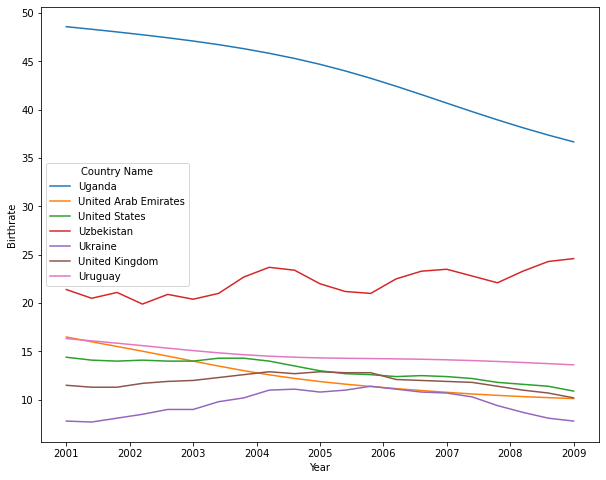

In [221]:
xlabs = list(range(2000,2021))
plt.figure(figsize = (10,8))
ax = sns.lineplot(data=birth_long, x = 'Year', y = 'Birthrate', hue = 'Country Name')
ax.set_xticklabels(xlabs)

This gives a clearer representation of the data in the dataframe, and it lets me visualize that 7th country. It would be even more important to present this way if I was working with even more countries. When I found the mean birthrate across countries (above), I commented that the birthrate decreases slightly across time. With this graph, it becomes apparent that decrease in birthrate in Uganda heavily contributes to the overall decrease in birthrate in the seven countries considered, while decreases in birthrate in Uruguay, United States, and United Arab Emirates contribute less strongly to the overall decrease. Both Ukraine and United Kingdom show a slight increase, followed by a slight decrease in the 21 years under consideration. Uzbekistan has more undulation relative to the other countries. I'd be curious if these changes correspond to periods of unrest vs. relative peace in the area.